In [41]:
# Dependencies and Setup
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Study data files
mouse_data = "data/Mouse_metadata.csv"
study_data = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data)
study_data = pd.read_csv(study_data)


In [42]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_data, study_data, on="Mouse ID")
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = combined_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [44]:
count_regimen_df = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().to_frame().reset_index()
count_regimen_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


## Bar plots

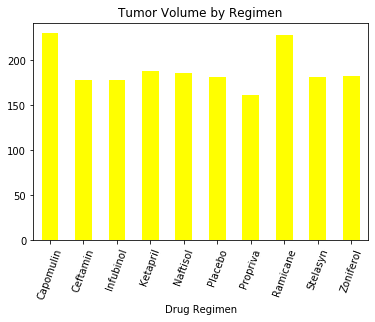

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().plot(kind='bar', y='Tumor Volume (mm3)', rot=70, color='yellow', title="Tumor Volume by Regimen")

Text(0, 0.5, 'Tumor Volume (mm3)')

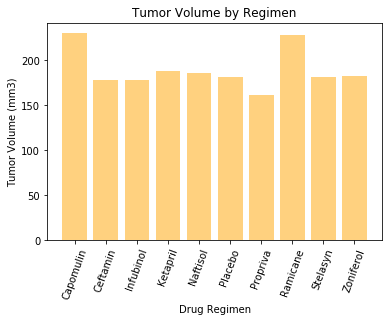

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(count_regimen_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, count_regimen_df['Tumor Volume (mm3)'], color='orange', alpha=.5, align="center")
plt.xticks(tick_locations, count_regimen_df['Drug Regimen'], rotation=70)
plt.title("Tumor Volume by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

## Pie plots

In [47]:
sex_df = combined_data_df.groupby('Sex')['Sex'].count()
print(sex_df)

Sex
Female    935
Male      958
Name: Sex, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a241a34d0>],
      dtype=object)

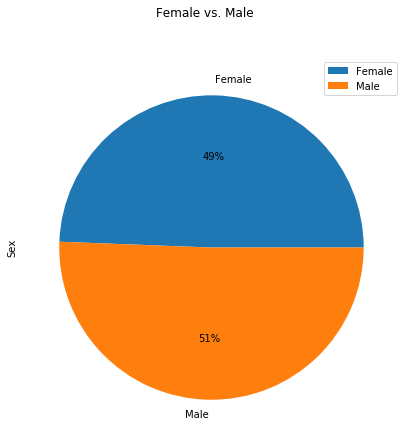

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df.plot.pie(figsize=(7,7), subplots=True, title=("Female vs. Male"), legend=True, autopct='%.0f%%')

No handles with labels found to put in legend.


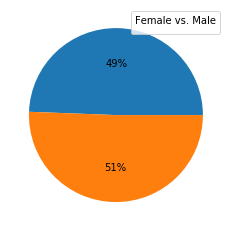

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, autopct='%.0f%%')
plt.legend(loc = 'upper right', title="Female vs. Male")

## Quartiles, outliers and boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [51]:
TargetRegimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
DeeRegimen_df = combined_data_df[combined_data_df['Drug Regimen'].isin(TargetRegimen)]
Capomulin_df = DeeRegimen_df[DeeRegimen_df['Drug Regimen'] == 'Capomulin']
Ramicane_df = DeeRegimen_df[DeeRegimen_df['Drug Regimen'] == 'Ramicane']
Infubinol_df = DeeRegimen_df[DeeRegimen_df['Drug Regimen'] == 'Infubinol']
Ceftamin_df = DeeRegimen_df[DeeRegimen_df['Drug Regimen'] == 'Ceftamin']

In [52]:
# Displaying all unique time points to determine the last point.

DeeRegimen_df.drop_duplicates(['Timepoint'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [53]:
# Based on the requirements, we are looking at the final tumor volume which will be at timepoint 45 for each mouse.  

Final_timepoint_45_df = DeeRegimen_df[DeeRegimen_df['Timepoint'].eq(45)].reset_index()
Final_timepoint_45_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
58,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
59,1813,y163,Infubinol,Female,17,27,45,67.685569,3
60,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
61,1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [54]:
#Calculate the IQR and quantitatively
Final_quartiles = Final_timepoint_45_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
FinalLowerQ = Final_quartiles[.25]
FinalMedianQ = Final_quartiles[.5]
FinalUpperQ = Final_quartiles[.75]
FinalIQR = FinalUpperQ - FinalLowerQ
FinalLowerBound = FinalLowerQ - (1.5*FinalIQR)
FinalUpperBound = FinalUpperQ + (1.5*FinalIQR)

print(f"The lower quartile for the final Regimen Tumor Volume is: {FinalLowerQ}")
print(f"The median for the final Regimen Tumor Volume is: {FinalMedianQ}")
print(f"The upper quartile for the final Regimen Tumor Volume is: {FinalUpperQ}")
print(f"The interquartile range for the final Regimen Tumor Volume is: {FinalIQR}")
print(f"The final tumor volume values below {FinalLowerBound} could be outliers.")
print(f"The final tumor volume values above {FinalUpperBound} could be outliers.")

#Listing potential outlier, if any.
outlier_Tumor_Volume_df = Final_timepoint_45_df.loc[(Final_timepoint_45_df['Tumor Volume (mm3)'] < FinalLowerBound) | (Final_timepoint_45_df['Tumor Volume (mm3)'] > FinalUpperBound)]
outlier_Tumor_Volume_df

The lower quartile for the final Regimen Tumor Volume is: 33.48002734
The median for the final Regimen Tumor Volume is: 40.1592203
The upper quartile for the final Regimen Tumor Volume is: 62.14221369
The interquartile range for the final Regimen Tumor Volume is: 28.66218635
The final tumor volume values below -9.513252184999999 could be outliers.
The final tumor volume values above 105.135493215 could be outliers.


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


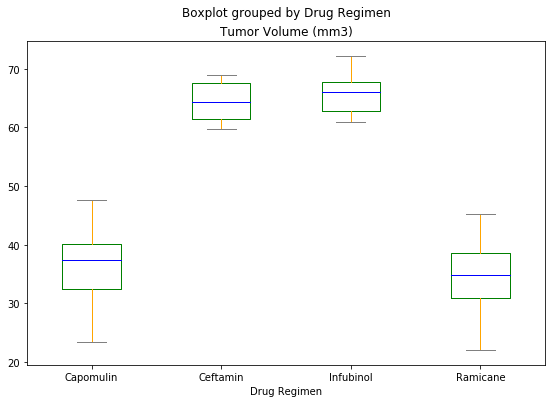

In [55]:
color = {'boxes': 'Green', 'whiskers': 'Orange','medians': 'Blue', 'caps': 'Gray'}
Final_timepoint_45_df.boxplot(by = 'Drug Regimen', column=['Tumor Volume (mm3)'], grid=False, color=color, sym='r', figsize=(9,6))

## Line and scatter plots

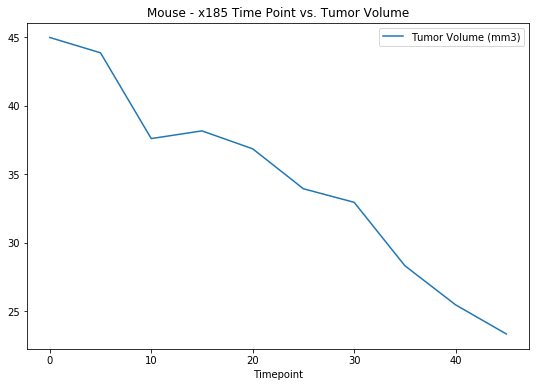

In [56]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse_df = Capomulin_df[Capomulin_df['Mouse ID'] == 's185']
one_mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', figsize=(9,6), title="Mouse - x185 Time Point vs. Tumor Volume")


In [57]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [58]:
# Create new datafram that groups mouse weight to average tumor volume
by_weight_df = Capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().to_frame().reset_index()
by_weight_df

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


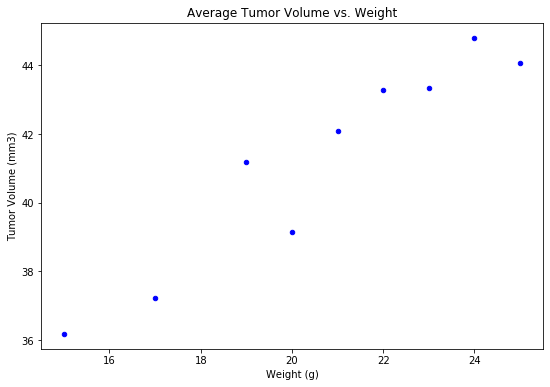

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
by_weight_df.plot(kind='scatter', x='Weight (g)', y= 'Tumor Volume (mm3)', color ='blue', figsize=(9,6), title="Average Tumor Volume vs. Weight")

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Using Pearson correlation coefficient
weight = by_weight_df.iloc[:,0]
avTuVol = by_weight_df.iloc[:,1]
correlation =st.pearsonr(weight,avTuVol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


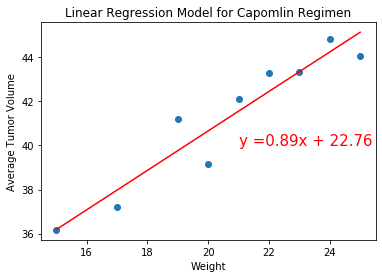

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avTuVol)
regress_values = weight * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avTuVol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,xy=(21,40),fontsize=15,color="red")
plt.title('Linear Regression Model for Capomlin Regimen')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [62]:
# Observations:

# Capomulin and Ramicane had the least tumor volume at the end of the study.
# Tumor volume had a positive correlation with the weight of the mice.
# Based on the requirements for the IQR and quantitatively, there were NO outliers.